# 來源

[遗传算法 莫烦](https://morvanzhou.github.io/tutorials/machine-learning/evolutionary-algorithm/2-01-genetic-algorithm/)

[github 完整代碼](https://morvanzhou.github.io/tutorials/)

# 各項函數

* 計算函數值 F(x) 
* 計算適應度 get_fitness(pred) 
* 選(天)擇 select(pop, fitness)  
* 交配 crossover(parent, pop) 
* 變異 mutate(child) 

    初始化基因池 -> 計算函數值 -> 計算適應度 -> 選(天)擇 
                -> 交配 -> 變異

    pop -> F_values{F(x)} -> fitness{get_fitness(pred)} -> select(pop, fitness) 
        -> crossover(parent, pop) -> mutate(child)

In [2]:

"""
參考自
https://morvanzhou.github.io/tutorials/
"""
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 10            # DNA length 切多細 ex:[1 0 1 0 0 1 1 1 1 1]
POP_SIZE = 100           # population size 幾條基因
CROSS_RATE = 0.8         # mating probability (DNA crossover) 交配率
MUTATION_RATE = 0.003    # mutation probability 突變率
N_GENERATIONS = 200      # 繁衍幾代
X_BOUND = [0, 5]         # x upper and lower bounds x範圍

# to find the maximum of this function
# 目標(適應)函數 求最大值
def F(x): 
    return np.sin(10*x)*x + np.cos(2*x)*x    


# find non-zero fitness for selection 
# 計算適應度
def get_fitness(pred): 
    '''
    arg:
        pred: F(translateDNA(pop)) 基因池->目標函數{轉換函數{基因}}
                
    return: 基因池的各個適應度 fitness
    
    基因池[[1 0 1 0 0 1 1 1 1 1],[0 0 1 0 0 1 1 0 1 0],...]
        -> 目標函數{轉換函數{基因}}
        -> F(translateDNA(pop))
    '''
    # 1e-3:防止出現0
    # pred - np.min(pred) 令適應度>0 方便計算總合
    return pred + 1e-3 - np.min(pred)


# convert binary DNA to decimal and normalize it to a range(0, 5)
# 轉換
def translateDNA(pop): 
    '''
    arg:
        pop: 基因池 [[1 0 1 0 0 1 1 1 1 1],...]
    
    return: X in X_BOUND[0 - 5]
    
    轉換對應的值域
    [1 0 1 0 0 1 1 1 1 1] -> X in X_BOUND[0 - 5] 
    '''
    
    # 01 轉 10進位 [1 0 1 0 0 1 1 1 1 1] -> 2**9+2**8+... 2**[9-0]
    pop2 = pop.dot(2 ** np.arange(DNA_SIZE)[::-1])
    # 二進位轉換對應的值域
    # float(2**DNA_SIZE-1) -> [1 1 1 1 1 1 1 1 1 1] 總和
    # X_BOUND 對應的值域
    return pop2 / float(2**DNA_SIZE-1) * (X_BOUND[1]-X_BOUND[0]) + X_BOUND[0]

# 選擇
def select(pop, fitness):    # nature selection wrt pop's fitness
    '''
    arg:
        pop: 基因池 [[1 0 1 0 0 1 1 1 1 1],...]
        fitness: 適應度 
    
    return: 基因池[適應度高的...]
    '''
    
    # 產生選擇的號碼
    # 根據適應度比重選取 比重越高選中越多次
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                            p=fitness/fitness.sum()) # 根據適應度比重選取
    # 返回號碼對應的值
    return pop[idx]

# 交配
def crossover(parent, pop):     # mating process (genes crossover)
    '''
    arg:
        parent: 一維,DNA_SIZE
        pop: 二維,size=(POP_SIZE, DNA_SIZE)
        
    return: 返回交配後的基因
    
    隨機選擇交配基因(1條基因)，
    隨機選擇交換基因點位(複數點位)(均勻交配)
    '''
    # parent:一維,DNA_SIZE
    # pop:二維,size=(POP_SIZE, DNA_SIZE)
    if np.random.rand() < CROSS_RATE:
        # select another individual from pop
        # 隨機選取1條基因
        i_ = np.random.randint(0, POP_SIZE, size=1)
        # choose crossover points 
        # 隨機選取基因交換點位(均勻交配)
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)
        # 交換
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    # 返回交換後的基因
    return parent

# 變異
def mutate(child):
    '''
    arg:
        child: 交配後的1條基因
        
    return: child 變異
    
    隨機選取點位變異
    '''
    
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child



'\n參考自\nhttps://morvanzhou.github.io/tutorials/\n'

# 執行

In [6]:
# 初始化基因池 -> 計算函數值 -> 計算適應度 -> 選(天)擇 
#             -> 交配 -> 變異

# pop -> F_values{F(x)} -> fitness{get_fitness(pred)} -> select(pop, fitness) 
#     -> crossover(parent, pop) -> mutate(child)

# 初始化基因池
# np.random.randint(2,size) 隨機整數 0~2[0,1] 
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))   

# 繁衍幾代
for _ in range(N_GENERATIONS):
    
    # 計算函數值
    F_values = F(translateDNA(pop))    

    # 計算適應度
    fitness = get_fitness(F_values)
    
    # 選(天)擇 
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        # 交配
        child = crossover(parent, pop_copy)
        # 變異
        child = mutate(child)
        parent[:] = child 
        
# 印出
max_DNA_in_pop = np.argmax(fitness)
print("Most fitted DNA: ", pop[max_DNA_in_pop, :])
print("X: ", translateDNA(pop[max_DNA_in_pop, :]))
print("函數值 = ", F_values[max_DNA_in_pop])

Most fitted DNA:  [1 0 1 0 1 0 0 0 1 1]
X:  3.2991202346041053
函數值 =  6.435822320543684


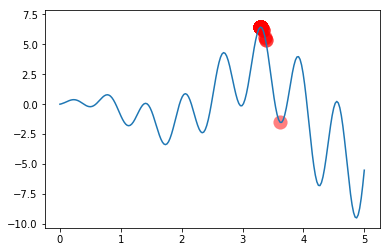

In [7]:
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))
plt.scatter(translateDNA(pop), F(translateDNA(pop)) , s=200, lw=0, c='red', alpha=0.5)

# 畫圖

在jupyter 難以顯示快速疊圖

    %matplotlib qt5
    # 使用QT，疊圖成功，但未刷新，到處都是紅點

In [9]:
%matplotlib qt5
# 使用QT，疊圖成功，但未刷新，到處都是紅點

import matplotlib.pyplot as plt

# initialize the pop DNA
# 初始化基因池
# np.random.randint(2,size) 隨機整數 0~2[0,1] 
pop = np.random.randint(0,2, size=(POP_SIZE, DNA_SIZE))   

# something about plotting
# 畫圖
plt.ion()       
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))

# 繁衍幾代
for _ in range(N_GENERATIONS):
    
    # 計算函數值
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA

    # something about plotting
    # 畫圖
    if 'sca' in globals(): 
        sca.remove()
        
    plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # GA part (evolution)
    fitness = get_fitness(F_values)
    print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # parent is replaced by its child

plt.ioff(); plt.show()